In [2]:
# importing the necessary libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import pickle
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_app = pd.read_csv("application_data.csv")
df_app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# the dataset contains 307511 rows and 122 columns.
df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

# checking for missing values

In [6]:
# missing values percentage for all columns
for i in df_app.columns:
    print(i, "-->", round(df_app[i].isna().sum()/df_app.shape[0]*100, 2))

SK_ID_CURR --> 0.0
TARGET --> 0.0
NAME_CONTRACT_TYPE --> 0.0
CODE_GENDER --> 0.0
FLAG_OWN_CAR --> 0.0
FLAG_OWN_REALTY --> 0.0
CNT_CHILDREN --> 0.0
AMT_INCOME_TOTAL --> 0.0
AMT_CREDIT --> 0.0
AMT_ANNUITY --> 0.0
AMT_GOODS_PRICE --> 0.09
NAME_TYPE_SUITE --> 0.42
NAME_INCOME_TYPE --> 0.0
NAME_EDUCATION_TYPE --> 0.0
NAME_FAMILY_STATUS --> 0.0
NAME_HOUSING_TYPE --> 0.0
REGION_POPULATION_RELATIVE --> 0.0
DAYS_BIRTH --> 0.0
DAYS_EMPLOYED --> 0.0
DAYS_REGISTRATION --> 0.0
DAYS_ID_PUBLISH --> 0.0
OWN_CAR_AGE --> 65.99
FLAG_MOBIL --> 0.0
FLAG_EMP_PHONE --> 0.0
FLAG_WORK_PHONE --> 0.0
FLAG_CONT_MOBILE --> 0.0
FLAG_PHONE --> 0.0
FLAG_EMAIL --> 0.0
OCCUPATION_TYPE --> 31.35
CNT_FAM_MEMBERS --> 0.0
REGION_RATING_CLIENT --> 0.0
REGION_RATING_CLIENT_W_CITY --> 0.0
WEEKDAY_APPR_PROCESS_START --> 0.0
HOUR_APPR_PROCESS_START --> 0.0
REG_REGION_NOT_LIVE_REGION --> 0.0
REG_REGION_NOT_WORK_REGION --> 0.0
LIVE_REGION_NOT_WORK_REGION --> 0.0
REG_CITY_NOT_LIVE_CITY --> 0.0
REG_CITY_NOT_WORK_CITY --> 0.0
LIVE_C

In [7]:
# getting those columns which were having less than 5 percentage missing values
new_df = df_app.loc[:, df_app.isna().sum()/df_app.shape[0]*100 < 5]
new_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
new_df.shape

(307511, 65)

In [9]:
# dropping missing values
new_df.dropna(inplace = True)

In [10]:
new_df.shape

(304531, 65)

# checking for duplicates

In [11]:
# there are no duplicates
new_df.duplicated().sum()

0

In [12]:
new_df.reset_index(drop = True, inplace = True)

In [13]:
new_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCI

In [14]:
# no of unique values in each feature
for i in new_df.columns:
    print(i, "--->", new_df[i].nunique())

SK_ID_CURR ---> 304531
TARGET ---> 2
NAME_CONTRACT_TYPE ---> 2
CODE_GENDER ---> 3
FLAG_OWN_CAR ---> 2
FLAG_OWN_REALTY ---> 2
CNT_CHILDREN ---> 15
AMT_INCOME_TOTAL ---> 2512
AMT_CREDIT ---> 5585
AMT_ANNUITY ---> 13652
AMT_GOODS_PRICE ---> 985
NAME_TYPE_SUITE ---> 7
NAME_INCOME_TYPE ---> 8
NAME_EDUCATION_TYPE ---> 5
NAME_FAMILY_STATUS ---> 5
NAME_HOUSING_TYPE ---> 6
REGION_POPULATION_RELATIVE ---> 81
DAYS_BIRTH ---> 17458
DAYS_EMPLOYED ---> 12556
DAYS_REGISTRATION ---> 15678
DAYS_ID_PUBLISH ---> 6167
FLAG_MOBIL ---> 1
FLAG_EMP_PHONE ---> 2
FLAG_WORK_PHONE ---> 2
FLAG_CONT_MOBILE ---> 2
FLAG_PHONE ---> 2
FLAG_EMAIL ---> 2
CNT_FAM_MEMBERS ---> 17
REGION_RATING_CLIENT ---> 3
REGION_RATING_CLIENT_W_CITY ---> 3
WEEKDAY_APPR_PROCESS_START ---> 7
HOUR_APPR_PROCESS_START ---> 24
REG_REGION_NOT_LIVE_REGION ---> 2
REG_REGION_NOT_WORK_REGION ---> 2
LIVE_REGION_NOT_WORK_REGION ---> 2
REG_CITY_NOT_LIVE_CITY ---> 2
REG_CITY_NOT_WORK_CITY ---> 2
LIVE_CITY_NOT_WORK_CITY ---> 2
ORGANIZATION_TYPE ---> 58


 # unique values in each feature

In [15]:
for i in new_df.columns:
    print(i, "\n", new_df[i].unique())
    print("\n")

SK_ID_CURR 
 [100002 100003 100004 ... 456253 456254 456255]


TARGET 
 [1 0]


NAME_CONTRACT_TYPE 
 ['Cash loans' 'Revolving loans']


CODE_GENDER 
 ['M' 'F' 'XNA']


FLAG_OWN_CAR 
 ['N' 'Y']


FLAG_OWN_REALTY 
 ['Y' 'N']


CNT_CHILDREN 
 [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]


AMT_INCOME_TOTAL 
 [202500.  270000.   67500.  ...  96768.  546250.5 113062.5]


AMT_CREDIT 
 [ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]


AMT_ANNUITY 
 [24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]


AMT_GOODS_PRICE 
 [ 351000.  1129500.   135000.   297000.   513000.   454500.  1395000.
 1530000.   913500.   405000.   652500.    67500.   697500.   679500.
  247500.   387000.   270000.   157500.   427500.   927000.   450000.
  225000.   702000.   675000.   180000.   477000.   360000.  1125000.
  553500.   540000.   855000.   238500.   598500.   252000.  1350000.
  666000.   202500.   517500.  1588500.  1080000.   810000.    90000.
  900000.  1035000.   463500.   459000.  

In [16]:
# dropping "XNA" value in code_gender feature 
new_df.drop(index = new_df[new_df["CODE_GENDER"] == "XNA"].index, axis = 0, inplace = True)

# feature engineering

In [17]:
new_df['AGE'] = (new_df['DAYS_BIRTH'] / 365.25).abs().astype(int)

new_df['YEARS_EMPLOYED'] = abs(new_df['DAYS_EMPLOYED'] / 365.25).round(1)

In [18]:
# dropping unnecessary columns
new_df.drop(columns = ['SK_ID_CURR', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 
                       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 
                       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
                       'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 
                       'DAYS_LAST_PHONE_CHANGE', 'EXT_SOURCE_2', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 
                       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
                       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
                       'FLAG_DOCUMENT_21', 'WEEKDAY_APPR_PROCESS_START'], inplace = True)

In [19]:
new_df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AGE,YEARS_EMPLOYED
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,Business Entity Type 3,25,1.7
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,2.0,School,45,3.3
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,Government,52,0.6
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,2.0,Business Entity Type 3,52,8.3
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,Religion,54,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304526,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,1.0,Services,25,0.6
304527,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,1.0,XNA,56,1000.0
304528,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,1.0,School,40,21.7
304529,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,Business Entity Type 1,32,13.1


In [20]:
new_df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE', 'AGE', 'YEARS_EMPLOYED'],
      dtype='object')

# exploratory data analysis

In [21]:
def plot(hue):    
    sns.countplot(new_df, x = "TARGET", stat = "percent", hue = hue)
    plt.title(f"Default_Rate vs {hue}")
    plt.xlabel('''non-default - 0 \n default - 1 ''')

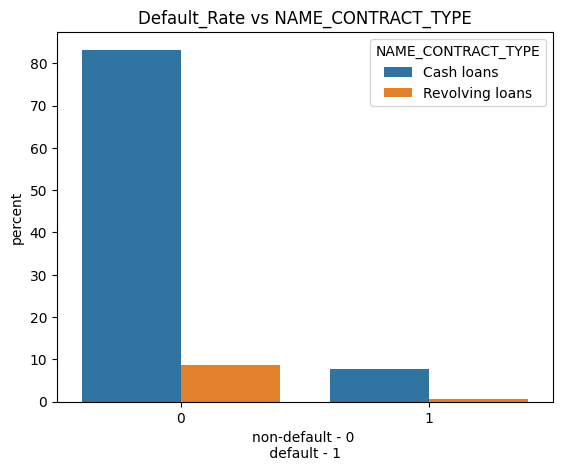

In [22]:
plot("NAME_CONTRACT_TYPE")
# here, people with cash loans have high numbers of defaulters than the people with revolving loans.

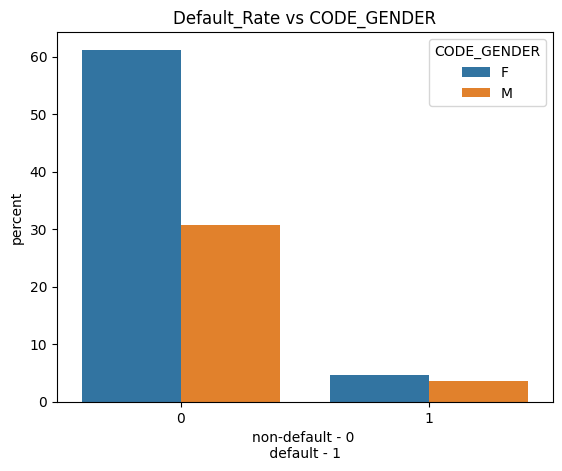

In [23]:
plot("CODE_GENDER")
# females have high defaulters than males.
# females have taken more loans than males.

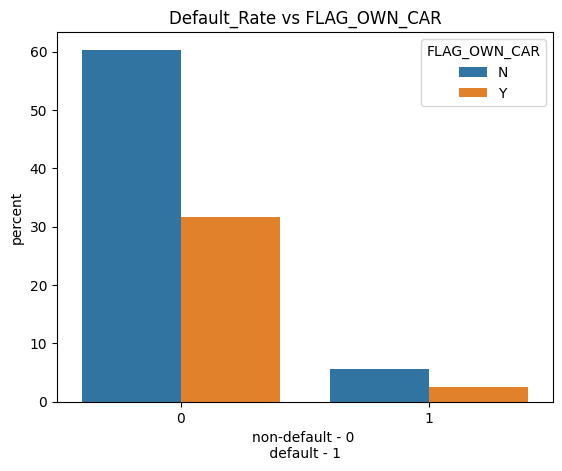

In [24]:
plot("FLAG_OWN_CAR")
# people who have car with themselves have less percentage of defaulters than the people who dont have car.

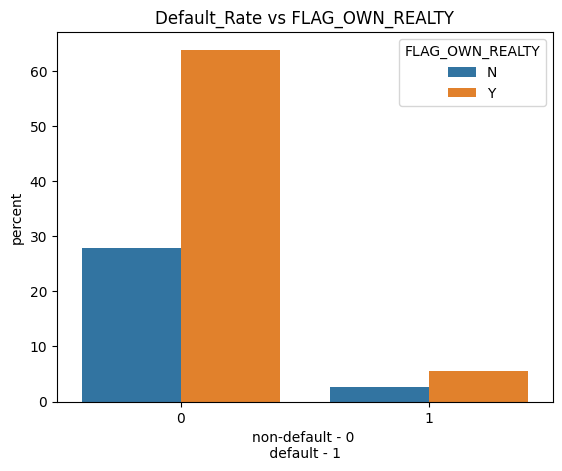

In [25]:
plot("FLAG_OWN_REALTY")
# people who have own house have high chance of turning into defaulters than people who dont have house

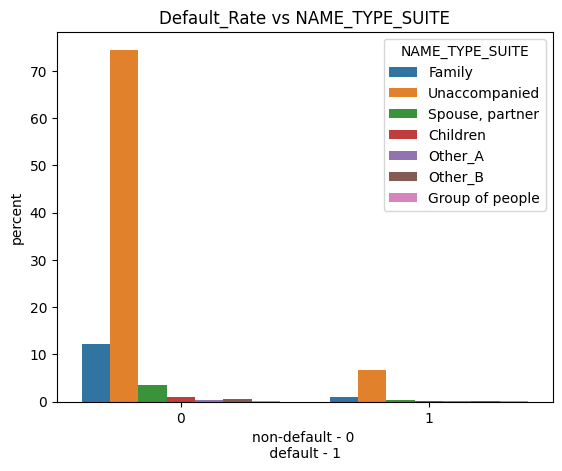

In [26]:
plot("NAME_TYPE_SUITE")
# people who are unaccompanied have turned into defaulters more likely than others.

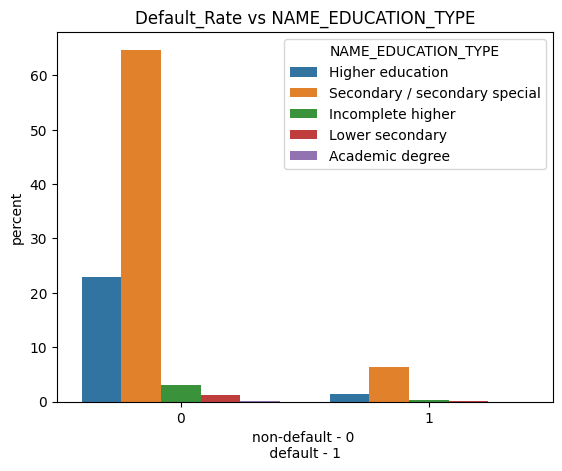

In [27]:
plot("NAME_EDUCATION_TYPE")
# people with secondary education level are more likely to turn as defaulters. 

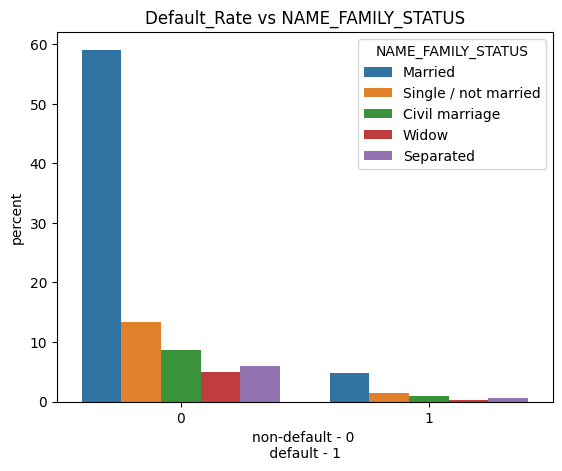

In [28]:
plot("NAME_FAMILY_STATUS")
# people who are married tend to get more loans and also they are also the ones who are more likely turning as defaulters.

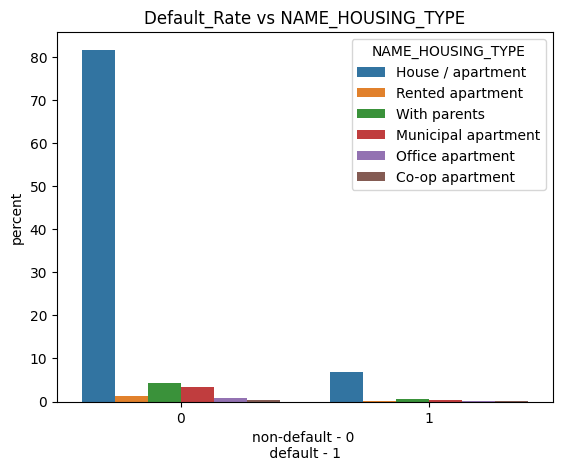

In [29]:
plot("NAME_HOUSING_TYPE")
# people who are living in house/apartment are mostly turned as defaulters.

Text(0.5, 1.0, 'Default_Rate vs ORGANIZATION_TYPE')

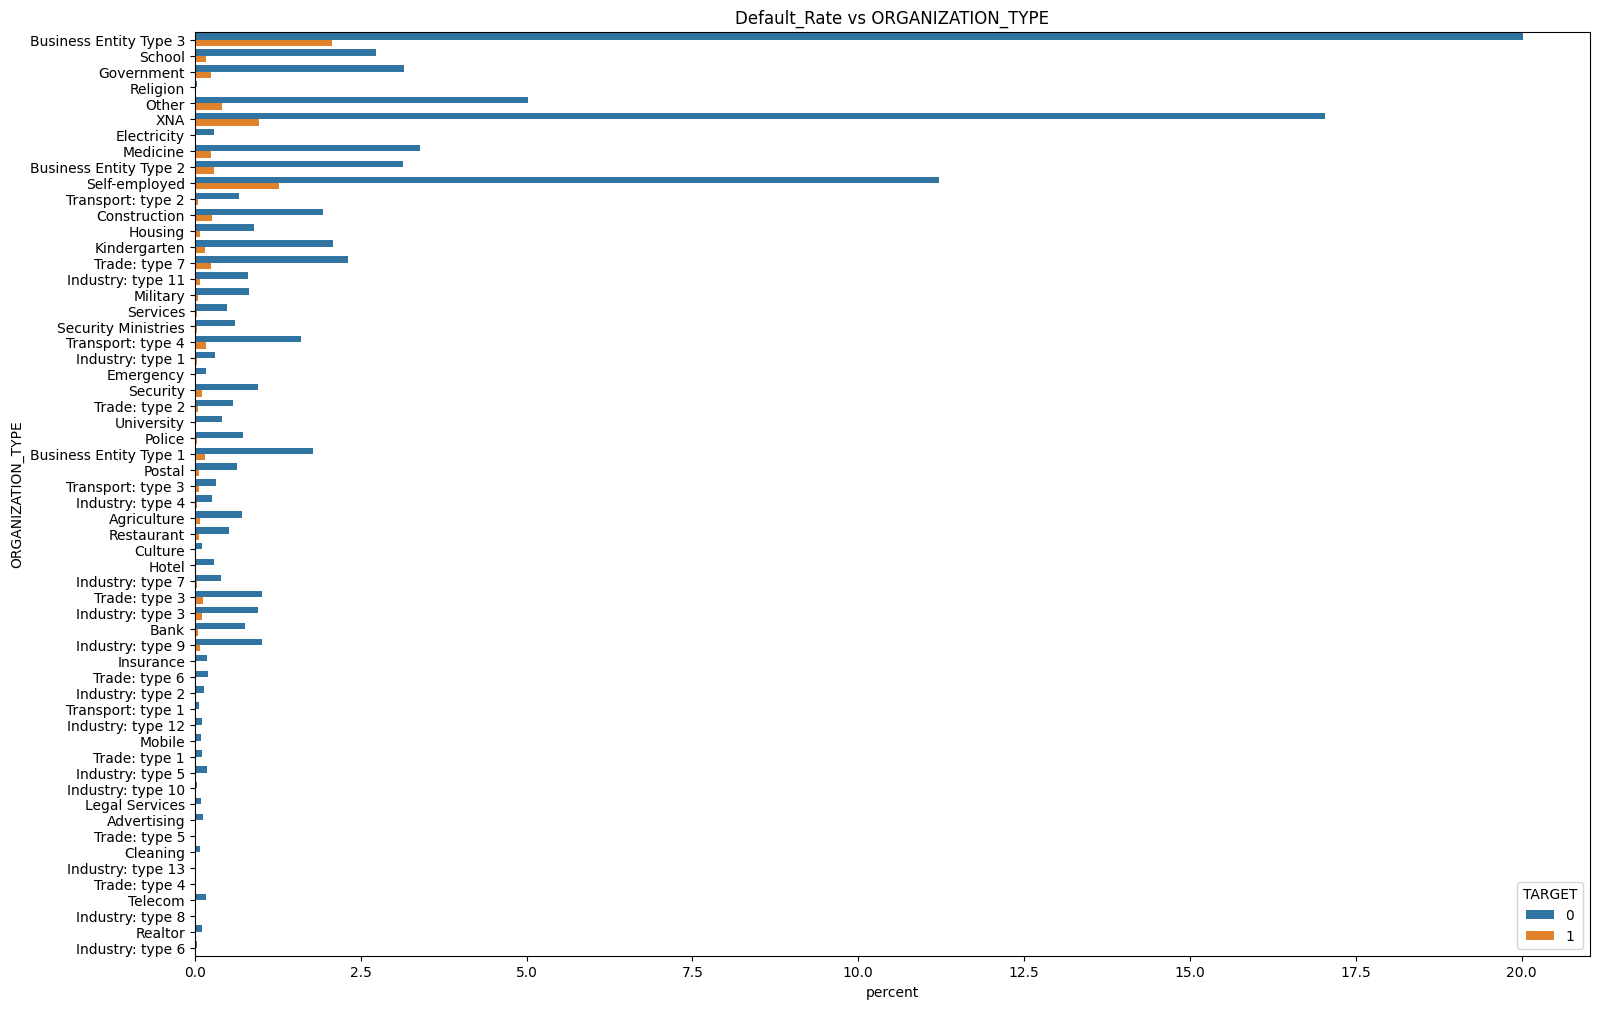

In [30]:
plt.figure(figsize = (18, 12))
sns.countplot(new_df, y = "ORGANIZATION_TYPE", stat = "percent", hue = "TARGET", orient = "h")
plt.title(f"Default_Rate vs ORGANIZATION_TYPE")

# people from business entity type organization, followed by self-employed have mostly turned into defaulters. 

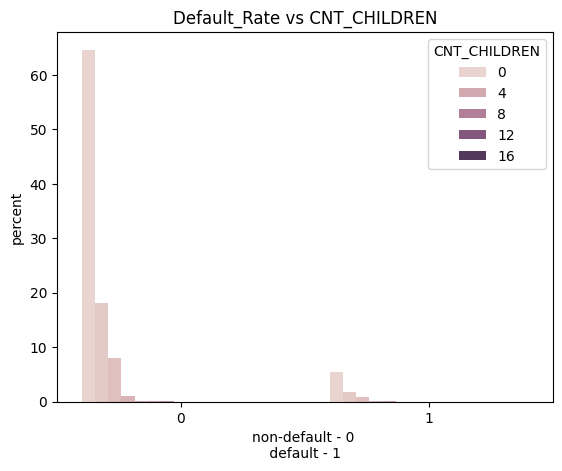

In [31]:
plot("CNT_CHILDREN")
# people who has no children has likely to default more than others.

# data types

In [32]:
new_df.dtypes

TARGET                   int64
NAME_CONTRACT_TYPE      object
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
CNT_FAM_MEMBERS        float64
ORGANIZATION_TYPE       object
AGE                      int32
YEARS_EMPLOYED         float64
dtype: object

# Label encoding

In [33]:
for i in new_df.select_dtypes("O"):
    print(i)

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
ORGANIZATION_TYPE


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in new_df.select_dtypes("O"):
    new_df[i + "encode"] = le.fit_transform(new_df[i])



In [35]:
new_df.shape

(304527, 29)

In [36]:
cor = new_df.corr(numeric_only = True)
cor

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,NAME_CONTRACT_TYPEencode,CODE_GENDERencode,FLAG_OWN_CARencode,FLAG_OWN_REALTYencode,NAME_TYPE_SUITEencode,NAME_INCOME_TYPEencode,NAME_EDUCATION_TYPEencode,NAME_FAMILY_STATUSencode,NAME_HOUSING_TYPEencode,ORGANIZATION_TYPEencode
TARGET,1.000000,0.019238,-0.003625,-0.030337,-0.012632,-0.039551,0.009187,-0.078602,-0.047292,-0.029909,0.055228,-0.021802,-0.006739,0.008502,0.046884,0.054491,-0.000170,0.034673,-0.031103
CNT_CHILDREN,0.019238,1.000000,0.013099,0.002264,0.021820,-0.001800,0.879267,-0.331476,-0.241538,0.030630,0.047605,0.102314,-0.002620,-0.013054,0.102496,-0.034827,-0.166247,0.021769,-0.144300
AMT_INCOME_TOTAL,-0.003625,0.013099,1.000000,0.155279,0.189892,0.157972,0.016376,-0.027288,-0.063769,-0.005378,0.073979,0.082707,0.003381,0.011951,-0.043750,-0.094813,-0.016478,-0.007522,-0.057909
AMT_CREDIT,-0.030337,0.002264,0.155279,1.000000,0.769208,0.986977,0.063281,0.056282,-0.063939,-0.220946,0.020605,0.115596,-0.037428,-0.018641,-0.071466,-0.119722,-0.102320,-0.054419,-0.052145
AMT_ANNUITY,-0.012632,0.021820,0.189892,0.769208,1.000000,0.774273,0.075869,-0.009886,-0.103305,-0.242020,0.076246,0.141227,-0.004790,-0.014279,-0.072504,-0.140663,-0.099557,-0.033586,-0.077213
AMT_GOODS_PRICE,-0.039551,-0.001800,0.157972,0.986977,0.774273,1.000000,0.061285,0.054568,-0.061747,-0.187110,0.021494,0.120138,-0.044021,-0.018629,-0.072118,-0.132686,-0.103375,-0.055557,-0.051560
CNT_FAM_MEMBERS,0.009187,0.879267,0.016376,0.063281,0.075869,0.061285,1.000000,-0.279568,-0.234284,0.012320,0.080626,0.150157,0.007093,-0.038969,0.099138,-0.021277,-0.567123,-0.027183,-0.138892
AGE,-0.078602,-0.331476,-0.027288,0.056282,-0.009886,0.054568,-0.279568,1.000000,0.623967,-0.086482,-0.148747,-0.130432,0.119120,-0.036589,-0.190524,0.151752,0.094174,-0.233173,0.395246
YEARS_EMPLOYED,-0.047292,-0.241538,-0.063769,-0.063939,-0.103305,-0.061747,-0.234284,0.623967,1.000000,-0.055661,-0.158995,-0.155418,0.070637,-0.040270,-0.307582,0.115671,0.142877,-0.107746,0.631218
NAME_CONTRACT_TYPEencode,-0.029909,0.030630,-0.005378,-0.220946,-0.242020,-0.187110,0.012320,-0.086482,-0.055661,1.000000,-0.009193,0.005907,0.066529,0.009972,0.006243,-0.062064,0.016690,0.024736,-0.039991


<Axes: >

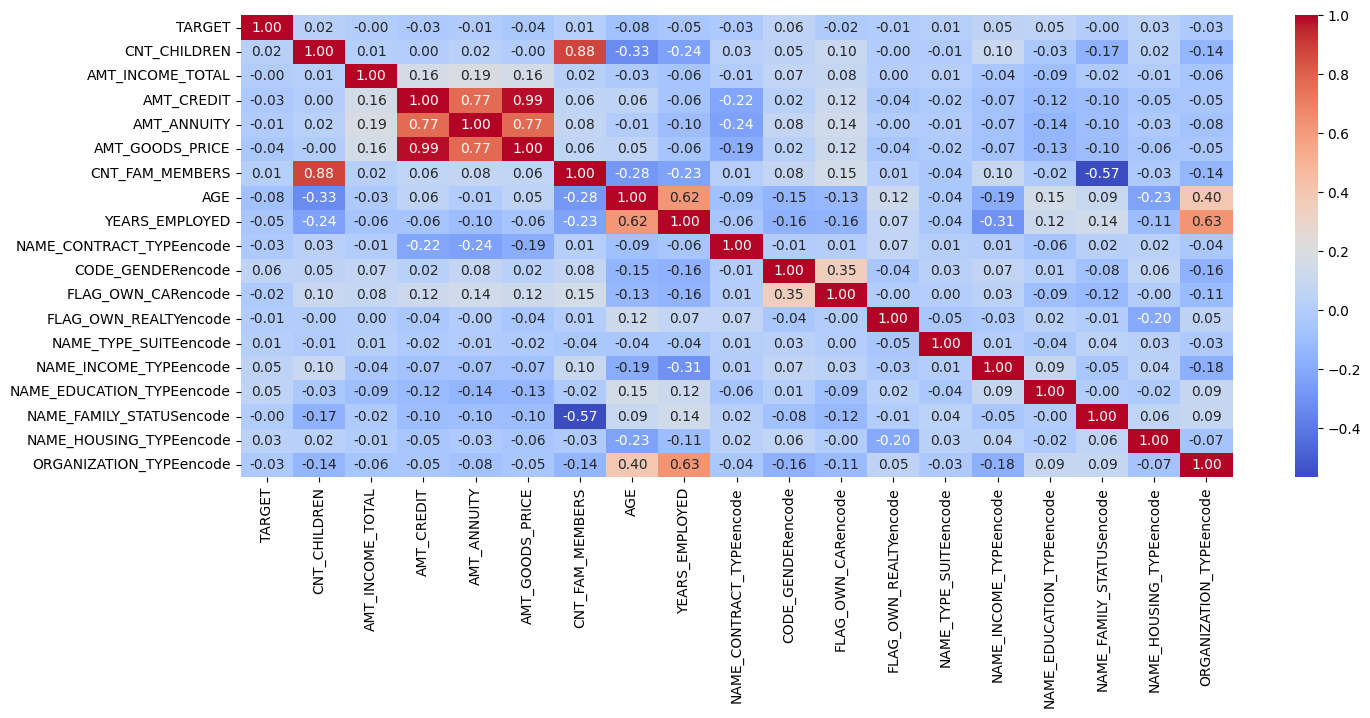

In [37]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize = (16,6))
sns.heatmap(cor, annot = True, fmt = ".2f", cmap = "coolwarm")

In [38]:
# dropping highly correlated columns AMT_GOODS_PRICE , CNT_CHILDREN

In [39]:
new_df.to_csv("Cleaned_Loan_application_data.csv", index = True, encoding = "utf-8-sig")

# ML model building

In [40]:
# input(X)
X = new_df[['AGE', 'YEARS_EMPLOYED', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'NAME_CONTRACT_TYPEencode', 'CODE_GENDERencode', 
            'FLAG_OWN_CARencode', 'FLAG_OWN_REALTYencode', 'NAME_TYPE_SUITEencode', 'NAME_INCOME_TYPEencode', 'NAME_EDUCATION_TYPEencode',
            'NAME_FAMILY_STATUSencode', 'NAME_HOUSING_TYPEencode', 'ORGANIZATION_TYPEencode']]
# output(Y)
Y = new_df["TARGET"]

# imbalanced data

In [41]:
print("1 -->", new_df["TARGET"].value_counts().__getitem__(1)/new_df.shape[0]*100, "%")
print("0 -->", new_df["TARGET"].value_counts().__getitem__(0)/new_df.shape[0]*100, "%")

1 --> 8.100102782347706 %
0 --> 91.8998972176523 %


In [42]:
new_df["TARGET"].value_counts()

TARGET
0    279860
1     24667
Name: count, dtype: int64

In [43]:
# using SMOTE(Synthetic Minority OverSampling TechniquE) to handle imbalanced data
print('Before:', Counter(Y))
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 1, k_neighbors = 3, random_state = 1)
resampled_X, resampled_Y = sm.fit_resample(X, Y)
print('Before:',Counter(resampled_Y))

Before: Counter({0: 279860, 1: 24667})
Before: Counter({1: 279860, 0: 279860})


using randomforest classifier to know feature importances

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()  
rf.fit(resampled_X, resampled_Y)

pred_y_train = rf.predict(resampled_X)                                                    
                                                                                              
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(resampled_Y, pred_y_train))        


Train Accuracy: 0.9999142428357035


In [45]:
# feature importances (top 20)
fea_imp = pd.DataFrame(list(zip(resampled_X.columns, rf.feature_importances_)), columns = ["features", "importance"]).sort_values("importance", ascending = False)
fea_imp.iloc[0:20, :]

,features,importance
5,CNT_FAM_MEMBERS,0.215222
1,YEARS_EMPLOYED,0.129489
15,ORGANIZATION_TYPEencode,0.090117
4,AMT_ANNUITY,0.074469
3,AMT_CREDIT,0.073268
11,NAME_INCOME_TYPEencode,0.072173
0,AGE,0.065939
8,FLAG_OWN_CARencode,0.059290
2,AMT_INCOME_TOTAL,0.056555
12,NAME_EDUCATION_TYPEencode,0.040157


In [46]:
# selecting those features which are greater than the threshold value of 0.01 
columns = fea_imp["features"][fea_imp["importance"] > 0.05].to_list()
columns

['CNT_FAM_MEMBERS',
 'YEARS_EMPLOYED',
 'ORGANIZATION_TYPEencode',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'NAME_INCOME_TYPEencode',
 'AGE',
 'FLAG_OWN_CARencode',
 'AMT_INCOME_TOTAL']

In [47]:
# input
X = resampled_X[columns]
# output
Y = resampled_Y

XGBClassifier, RandomForestClassifier and GradientBoostingClassifier

In [48]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# train test split(train - 70% and test - 30%)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state = 42)

# algorithms
algorithms = [XGBClassifier, RandomForestClassifier, 
                GradientBoostingClassifier]



for i in algorithms:
    model = i()
    model.fit(X_train, Y_train)

    pred_y_train = model.predict(X_train)
    pred_y_test = model.predict(X_test)

    print("Algorithm:", i.__name__)
    from sklearn.metrics import accuracy_score
    print("Train accuracy:", accuracy_score(Y_train, pred_y_train))            
    print("Test accuracy:", accuracy_score(Y_test, pred_y_test))  
    print("\n") 

Algorithm: XGBClassifier
Train accuracy: 0.9090999581423365
Test accuracy: 0.9075371018842755


Algorithm: RandomForestClassifier
Train accuracy: 0.9995865279578565
Test accuracy: 0.9325496081374021


Algorithm: GradientBoostingClassifier
Train accuracy: 0.8718925789425325
Test accuracy: 0.8730734414826461




Selecting random forest model as the best model as it is having higher accuracy than the other models.

In [49]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, Y_train)

pred_y_train = model.predict(X_train)
pred_y_test = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Train accuracy:", accuracy_score(Y_train, pred_y_train))            
print("Test accuracy:", accuracy_score(Y_test, pred_y_test))

Train accuracy: 0.9995686618819614
Test accuracy: 0.9322577955644489


In [50]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred_y_test)

array([[81980,  2072],
       [ 9303, 74561]], dtype=int64)

In [51]:
# precision, recall and f1 score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Precision:", precision_score(Y_test, pred_y_test))
print("Recall   :", recall_score(Y_test, pred_y_test))
print("F1-Score :", f1_score(Y_test, pred_y_test))

Precision: 0.9729620398522829
Recall   : 0.8890703996947439
F1-Score : 0.9291264011165318


# saving the best model (random forest model)

In [52]:
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(model, file)

In [53]:
val = X.loc[0,:].to_list()
val

[1.0, 1.7, 5.0, 24700.5, 406597.5, 7.0, 25.0, 0.0, 202500.0]

In [54]:
Y[0]

1

In [56]:
with open("random_forest_model.pkl", "rb") as file:
    best_model = pickle.load(file)

In [57]:
prediction = best_model.predict([val])

if prediction == 1:
    print("The Client is likely to default (having payment difficulties)")
if prediction == 0:
    print("The Client is likely to non-default (not having payment difficulties)")


The Client is likely to default (having payment difficulties)
